In [7]:
import os
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.nn.modules.container import Sequential
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from PIL import Image


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [22]:
epochs = 30
lr = 1e-3
batch_size = 128

In [12]:
device  = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [29]:
class AutoEncoder(nn.Module):

    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        #Encoders
        self.encoder = Sequential(                
                nn.Linear(784, 256),  
                nn.ReLU(),
                nn.Linear(256, 128),  
                nn.ReLU(), 
                nn.Linear(128, 64),  
                nn.ReLU(), 
                nn.Linear(64, 32),  
                nn.ReLU(),
                nn.Linear(32, 16),  
                nn.ReLU()
        )

        #Decoder
        self.decoder = Sequential(
                nn.Linear(16, 32),  
                nn.ReLU(),
                nn.Linear(32, 64),  
                nn.ReLU(), 
                nn.Linear(64, 128),  
                nn.ReLU(), 
                nn.Linear(128, 256),  
                nn.ReLU(),
                nn.Linear(256, 784),  
                nn.ReLU()
            )

    def forward(self, x):
        return self.layer(x)




In [23]:
model = AutoEncoder().to(device)
print(model)

AutoEncoder(
  (layer): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Linear(in_features=32, out_features=16, bias=True)
    (9): ReLU()
    (10): Linear(in_features=16, out_features=32, bias=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=64, bias=True)
    (13): ReLU()
    (14): Linear(in_features=64, out_features=128, bias=True)
    (15): ReLU()
    (16): Linear(in_features=128, out_features=256, bias=True)
    (17): ReLU()
    (18): Linear(in_features=256, out_features=784, bias=True)
    (19): ReLU()
  )
)


In [24]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [25]:
def make_dir():
    image_dir = r'C:\Users\neele\OneDrive\Documents\Git Repositories\PyTorch_Projects\MNIST_Out_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)

make_dir()

In [26]:
def save_decod_img(img, epoch):
    img = img.view(img.size(0), 1, 28, 28)
    save_image(img, r'C:\Users\neele\OneDrive\Documents\Git Repositories\PyTorch_Projects\MNIST_Out_Images\Autoencoder_image{}.png'.format(epoch))

In [17]:
def training(model, train_loader, Epochs):
    train_loss = []
    for epoch in range(Epochs):
        running_loss = 0.0
        for data in train_loader:
            img, _ = data
            img = img.to(device)
            img = img.view(img.size(0), -1)
            optimizer.zero_grad()
            outputs = model(img)
            loss = criterion(outputs, img)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        loss = running_loss / len(train_loader)
        train_loss.append(loss)
        print('Epoch {} of {}, Train Loss: {:.3f}'.format(
            epoch+1, Epochs, loss))

        if epoch % 5 == 0:
            save_decod_img(outputs.cpu().data, epoch)

    return train_loss

In [18]:
def test_image_reconstruct(model, test_loader):
     for batch in test_loader:
        img, _ = batch
        img = img.to(device)
        img = img.view(img.size(0), -1)
        outputs = model(img)
        outputs = outputs.view(outputs.size(0), 1, 28, 28).cpu().data
        save_image(outputs, 'MNIST_reconstruction.png')
        break

In [ ]:
train_loss = training(model, train_loader, epochs)

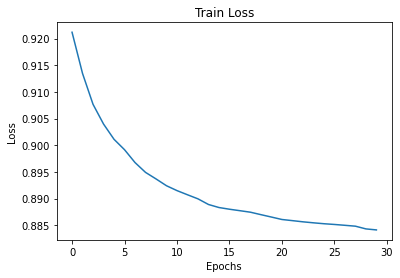

In [28]:
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_mnist_loss.png')